Intel Image Classification

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

In [ ]:
tf.keras.layers.

In [6]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


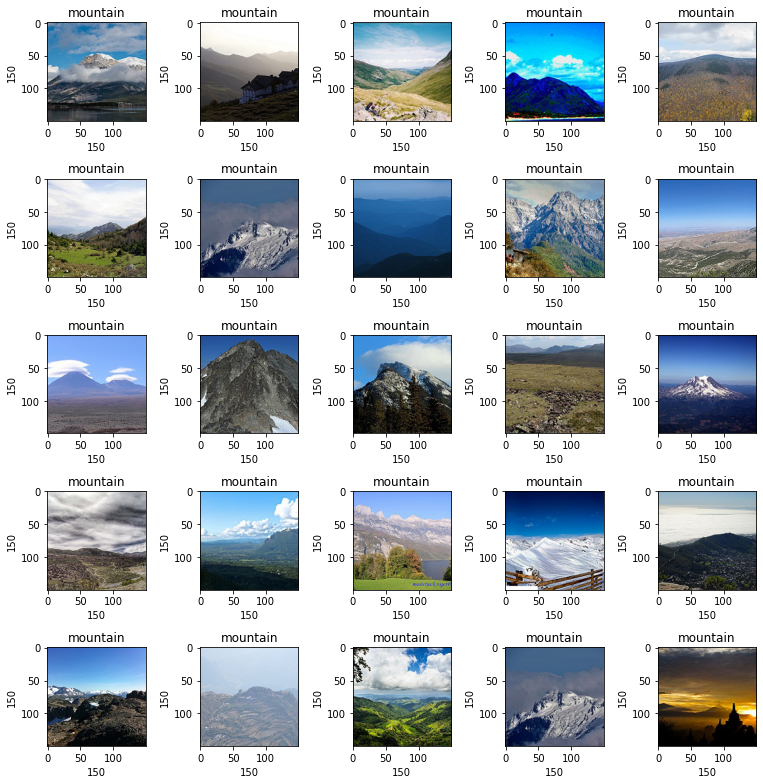

In [11]:
plt.figure(figsize=(11,11))
path = "C:/Users/pk/Desktop/Intel Image Dataset/mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [16]:
dirs = "C:/Users/pk/Desktop/Intel Image Dataset"
root_dir = listdir(dirs)
image_list, label_list = [], []

In [17]:
for directory in root_dir:
  for files in listdir(f"{dirs}/{directory}"):
    image_path = f"{dirs}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) # All images does not have same dimension
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [27]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

In [29]:
num_classes = len(label_counts)
num_classes

6

In [30]:
np.array(image_list).shape

(3000, 150, 150, 3)

In [31]:
label_list = np.array(label_list)
label_list.shape

(3000,)

In [33]:
# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [34]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

In [35]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [36]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [43]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),
    
        Dense(6, activation = 'softmax')    
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 16)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 146, 146, 32)      0

In [44]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [45]:
# Training the model
epochs = 70
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/70
15/15 [==============================] - 57s 4s/step - loss: 1.6355 - accuracy: 0.3839 - val_loss: 1.7431 - val_accuracy: 0.2062
Epoch 2/70
15/15 [==============================] - 53s 4s/step - loss: 1.3476 - accuracy: 0.5073 - val_loss: 1.7598 - val_accuracy: 0.1958
Epoch 3/70
15/15 [==============================] - 47s 3s/step - loss: 1.1702 - accuracy: 0.5880 - val_loss: 1.8781 - val_accuracy: 0.1667
Epoch 4/70
15/15 [==============================] - 46s 3s/step - loss: 1.0355 - accuracy: 0.6594 - val_loss: 1.9925 - val_accuracy: 0.1667
Epoch 5/70
15/15 [==============================] - 48s 3s/step - loss: 0.9419 - accuracy: 0.7021 - val_loss: 2.1718 - val_accuracy: 0.1667
Epoch 6/70
15/15 [==============================] - 46s 3s/step - loss: 0.8782 - accuracy: 0.7276 - val_loss: 2.0323 - val_accuracy: 0.1688
Epoch 7/70
15/15 [==============================] - 46s 3s/step - loss: 0.7885 - accuracy: 0.7661 - val_loss: 2.0590 - val_accuracy: 0.1667
Epoch 8/70
15/15 [==

15/15 [==============================] - 45s 3s/step - loss: 0.0407 - accuracy: 0.9984 - val_loss: 0.7920 - val_accuracy: 0.7375
Epoch 60/70
15/15 [==============================] - 45s 3s/step - loss: 0.0381 - accuracy: 0.9995 - val_loss: 0.7263 - val_accuracy: 0.7729
Epoch 61/70
15/15 [==============================] - 45s 3s/step - loss: 0.0400 - accuracy: 0.9995 - val_loss: 0.8099 - val_accuracy: 0.7479
Epoch 62/70
15/15 [==============================] - 45s 3s/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.8611 - val_accuracy: 0.7333
Epoch 63/70
15/15 [==============================] - 45s 3s/step - loss: 0.0386 - accuracy: 0.9995 - val_loss: 0.8635 - val_accuracy: 0.7688
Epoch 64/70
15/15 [==============================] - 44s 3s/step - loss: 0.0353 - accuracy: 0.9995 - val_loss: 0.7596 - val_accuracy: 0.7604
Epoch 65/70
15/15 [==============================] - 44s 3s/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.7095 - val_accuracy: 0.7771
Epoch 66/70
15/15 [======

In [46]:
model.save("intel_image.h5")

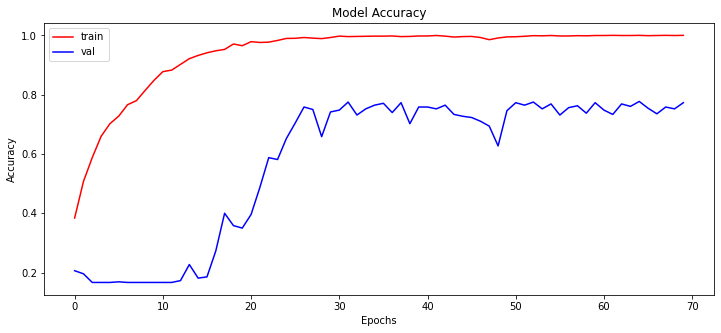

In [47]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

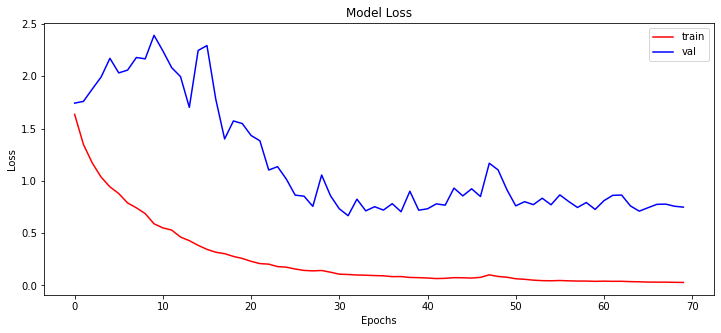

In [48]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [49]:
# Calculating test accuracy 
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 4s 190ms/step - loss: 0.6864 - accuracy: 0.7833
Test Accuracy: 78.33333611488342


In [50]:
# Storing model predictions
y_pred = model.predict(x_test)

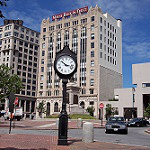

In [51]:
# Plotting image to compare
img = array_to_img(x_test[1])
img

In [52]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[1])])
print("Predicted : ",labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  buildings
Predicted :  buildings
